In this study, I will conduct a thorough statistical analysis of the classic "Iris" dataset, using descriptive measures, confidence intervals, hypothesis testing, correlation analysis, and linear regression. 

We start with downloading the dataset and importing the packages needed.

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as scs
from scipy.stats import t
from scipy.stats import f
from statsmodels.formula.api import ols

In [22]:
iris = pd.read_csv("./Data/iris.csv")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
123,6.3,2.7,4.9,1.8,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa


In [23]:
# setting default style for the plots
sns.set(style = 'darkgrid')

## Basic descriptive statistics

In [24]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Here we, for example, can clearly observe that iris sepals are usually larger than petals, but petals' length and width vary more than those of sepals.

In [25]:
# a little bit cleaning before further manipulations.
iris.columns = iris.columns.str.replace(' ', '') 

#checking for n/a
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Now the dataset is pretty tidy; I will save the mean for petal_length in a separate variable, as I will need that for my Hypothesis Test.

In [26]:
petal_len_mu = np.mean(iris['petal_length'])

## Encoding categorical features.

Now we have a general sense about the features, but what we are really interested in is the relations between them.

We have a "class" column, with data type "object", and that is not what we need for, e.g., correlation analysis. So, I am going to create a separate column with label encoding.

In [27]:
iris["category"] = iris["class"]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,category
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [28]:
iris["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
iris['category'] = iris['category'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,class,category
21,5.1,3.7,1.5,0.4,Iris-setosa,0
80,5.5,2.4,3.8,1.1,Iris-versicolor,1
130,7.4,2.8,6.1,1.9,Iris-virginica,2


## Exploratory Data Analysis

I will simply use the built-in pairplot function, which visualizes all the possible pair combinations of the features.

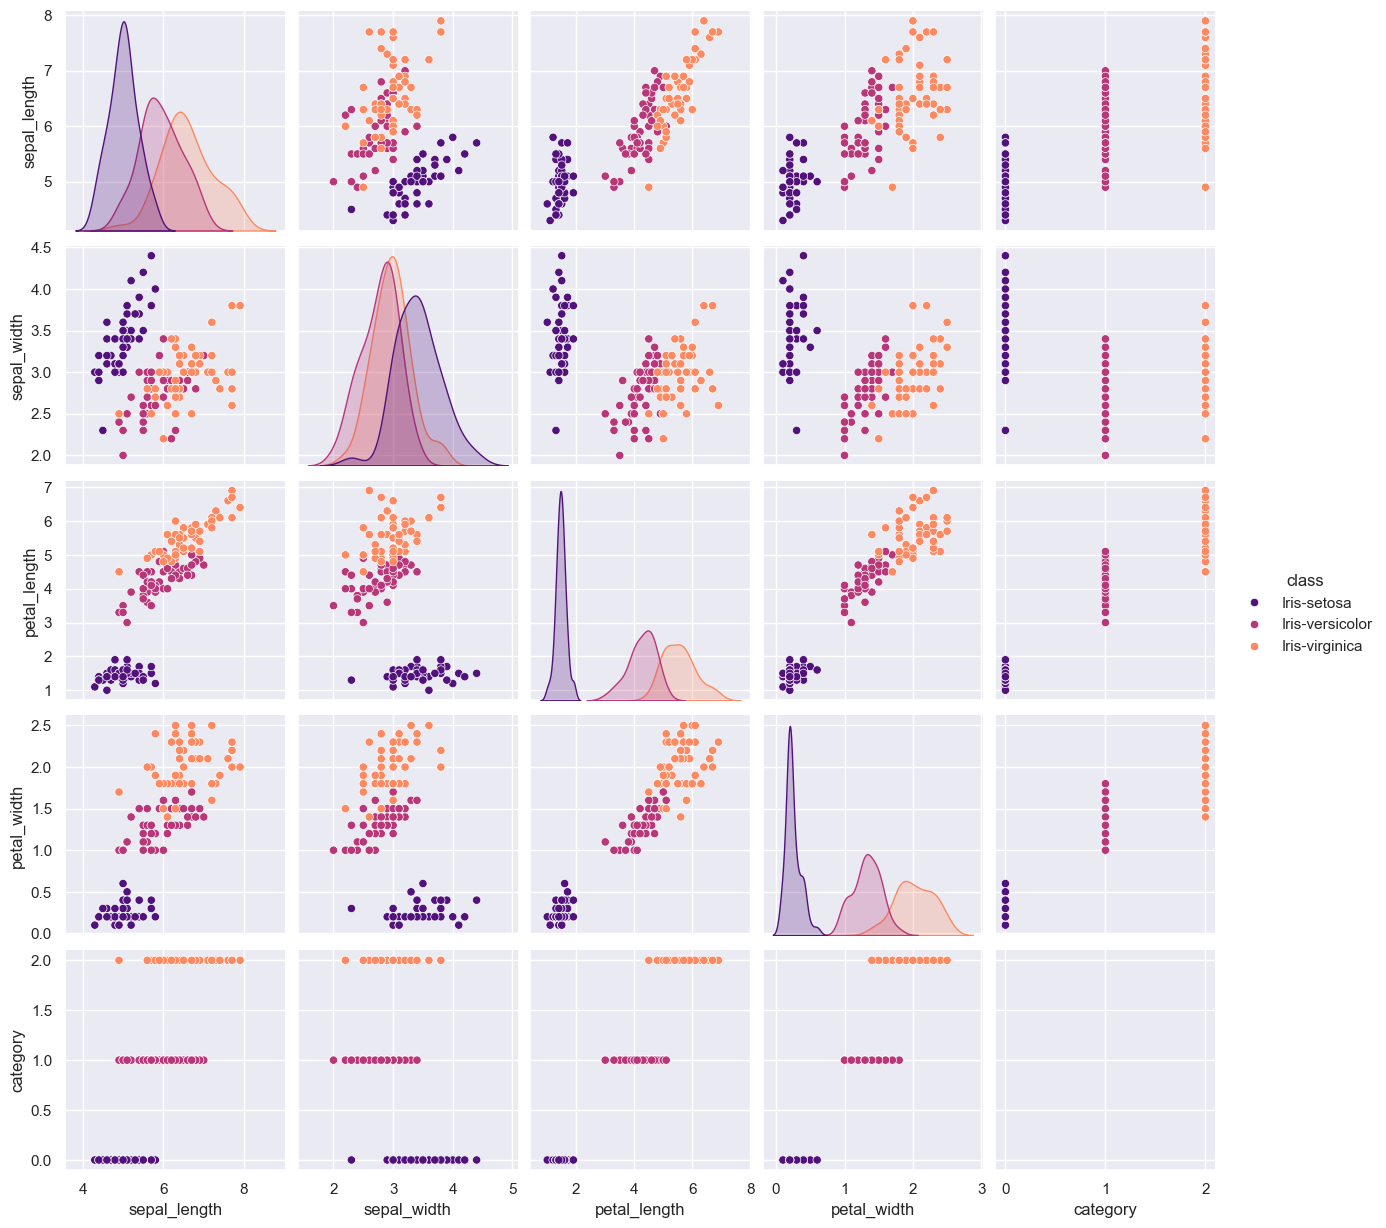

In [30]:
sns.pairplot(iris, hue = 'class', palette = 'magma')

It looks like we can clearly distinguish Iris-setosa flowers from other flower species, based on the petal length and width, but it's not that clear with other two species. Overall, Setosa makes clear separate clusters when we analyze the dependencies of most features.

## Confidence Intervals

Let's perform some statistical analysis on the three species separately.

In [31]:
# creating separate dataset for each species
setosa = iris[iris['class'] == 'Iris-setosa']
versicolor = iris[iris['class'] == 'Iris-versicolor']
virginica = iris[iris['class'] == 'Iris-virginica']
setosa.sample()

,sepal_length,sepal_width,petal_length,petal_width,class,category
15,5.7,4.4,1.5,0.4,Iris-setosa,0


In [32]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width,category
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


We have previously made an observation that petals' length and width vary more than those of sepals, which was true for the whole dataset, but not for Versicolor Irises.

In [33]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width,category
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0


In [34]:
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width,category
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


Let's construct a 95% confidence intervals for the mean petal width of the three species irises separately.

In [35]:
def construct_CI (species, feature, alpha):
    mean = np.mean(species[feature])
    n = len(species[feature])
    sem = scs.sem(species[feature])
    lower, upper = t.interval(confidence = 1-alpha, df = n-1, loc = mean, scale = sem)
    return lower, upper


In [36]:
alpha = 0.05

In [37]:
lower_setosa, upper_setosa = construct_CI (setosa, "petal_width", alpha)
lower_versicolor, upper_versicolor = construct_CI (versicolor, "petal_width", alpha)
lower_virginica, upper_virginica = construct_CI (virginica, "petal_width", alpha)

print (f"Confidence interval (\u03B1={alpha}) for average petal width of "
       f"\niris Setosa: {round(lower_setosa, 1)} - {round(upper_setosa, 1)} cm"
       f"\niris Versicolor: {round(lower_versicolor, 1)} - {round(upper_versicolor, 1)} cm"
       f"\niris Virginica: {round(lower_virginica, 1)} - {round(upper_virginica, 1)} cm"
    )

Confidence interval (α=0.05) for average petal width of 
iris Setosa: 0.2 - 0.3 cm
iris Versicolor: 1.3 - 1.4 cm
iris Virginica: 1.9 - 2.1 cm


I want also to construct the confidence interval for the whole population petal length mean, as I want to use this in my Hypothesis Test.


In [38]:
lower_population, upper_population = construct_CI (iris, "petal_length", alpha)

print (f"Confidence interval (\u03B1={alpha}) for average petal length of "
       f"\nirises: {round(lower_population, 1)} - {round(upper_population, 1)} cm")

Confidence interval (α=0.05) for average petal length of 
irises: 3.5 - 4.0 cm


## Hypothesis Tests

We have constructed the confidece intervals for petal width mean, here I want to pay attention to petal lengths.
First, let's check whether our impression that Setosa species stand out is true. I will test Iris Setosa Petal Length Vs Any Iris Petal Length (the whole dataset).

In [39]:
lower_population, petal_len_mu, upper_population

(3.473993663967714, 3.758666666666666, 4.0433396693656185)

**Hypothesis Test for Iris Setosa Petal Length**

**Null Hypothesis (\(H_0\)):** The mean petal length of Iris Setosa doesn't differ from the population mean.

**Alternative Hypothesis (\(H_a\)):** The mean petal length of Iris Setosa differs from the population mean, so that we can clearly distinguish Iris Setosa from other species based on this parameter.

In [40]:
sample = setosa['petal_length']
result = scs.ttest_1samp(a=sample, popmean = petal_len_mu)

print(result)

TtestResult(statistic=-93.51412127224333, pvalue=6.810197631052842e-57, df=49)


It looks like we definitely reject Null Hypothesis, but as we actually don't know the ***population*** mean, I will also use lower and upper limits of the confidence interval, just for sure.

In [41]:
result = scs.ttest_1samp(a=sample, popmean = lower_population)

print(result)

TtestResult(statistic=-81.91289566329934, pvalue=4.3078955712115395e-54, df=49)


In [42]:
sample = setosa['petal_length']
result = scs.ttest_1samp(a=sample, popmean = upper_population)

print(result)

TtestResult(statistic=-105.11534688118732, pvalue=2.273167228298817e-59, df=49)


Pretty persuasive: the t-test has detected a significant difference between the groups being compared. The negative t-statistics indicates that the Iris Setosa mean is significantly lower than the population mean (which is with 95% confidence somewhere between 3.47 and 4.04 cm)

**Hypothesis Test for Variance Comparison between Iris Versicolor and Iris Virginica Petal Length**

Now we are going to construct a hypothesis test to investigate whether the variance in petal length differs between Iris Versicolor and Iris Virginica species. We will use a significance level of $\alpha = 0.05$.

We will perform a one-sided test between two variances $\sigma^2_1$ and $\sigma^2_2$. We state our alternative hypothesis as $\sigma^2_{\text{Versicolor}}$ is greater than $\sigma^2_{\text{Virginica}}$, i.e.:

$H_A: \sigma^2_{\text{Versicolor}} > \sigma^2_{\text{Virginica}}$

The null hypothesis is:

$H_0: \sigma^2_{\text{Versicolor}} \leq \sigma^2_{\text{Virginica}}$

We will reject $H_0$ if the test statistic is large (>k).


Our test function is:

$F=\frac{\sigma^2_1}{\sigma^2_2}$

In [43]:
n_versicolor = len(versicolor)
n_virginica = len(virginica)
alpha = 0.05

n_versicolor, n_virginica

(50, 50)

In [44]:
var_quotient = np.var(versicolor['petal_length'], ddof = 1) / np.var(virginica['petal_length'], ddof = 1)
print (f"Test function's output, F-statistic: {var_quotient}")

Test function's output, F-statistic: 0.7249678387650087


In [45]:
vers = np.var(versicolor['petal_length'], ddof = 1)
virg = np.var(virginica['petal_length'], ddof = 1)

vers, virg

(0.22081632653061228, 0.30458775510204084)

In [46]:
result = f.ppf(q=alpha, dfn = n_versicolor-1, dfd = n_virginica - 1)

print (f"F-critical (k): {result}")

F-critical (k): 0.6221654675017775


Since the test statistic (F-statistic) is greater than the critical value, we reject the null hypothesis. This suggests that there is no evidence to support the claim that the variance in petal length for Iris Versicolor is less or equal to the variance for Iris Virginica (although this appears otherwise from what we observe in the dataset.) This means, that the observed difference in variances in the dataset (0.22<0.3) is not statistically significant.

## Correlation Analysis

We have already visualized the dependencies inside the dataset; let's now calculate the correlation coefficients between all the pairs of features.

We will have to drop non-numerical column ("class") first. We will still be able to identify species, as we have created "category" column with labels.

In [47]:
iris_nums = iris.drop(columns = 'class')
iris_nums.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,category
32,5.2,4.1,1.5,0.1,0
108,6.7,2.5,5.8,1.8,2
11,4.8,3.4,1.6,0.2,0


In [48]:
correlation_matrix = iris_nums.corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width,category
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
category,0.782561,-0.419446,0.949043,0.956464,1.000000


To make strong correlations visible, let's remain the upper diagonal only and add some formatting to the correlations >0.75 (or <-0.75)

In [49]:
threshold = 0.75
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
upper_triangle.style.map(lambda x: "color: purple; font-weight: bold" if (x>threshold or x<(-threshold)) else "")

,sepal_length,sepal_width,petal_length,petal_width,category
sepal_length,nan,-0.109369,0.871754,0.817954,0.782561
sepal_width,nan,nan,-0.420516,-0.356544,-0.419446
petal_length,nan,nan,nan,0.962757,0.949043
petal_width,nan,nan,nan,nan,0.956464
category,nan,nan,nan,nan,nan


We can also visualize the correlations using a heatmap.

<Axes: >

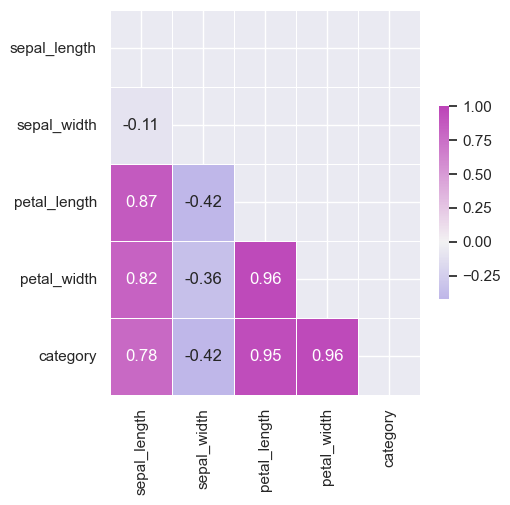

In [51]:
f, ax = plt.subplots(figsize = (5,5))
mask = np.triu(np.ones(correlation_matrix.shape), k=0).astype(bool)
cmap = sns.diverging_palette(270, 310, as_cmap = True)
sns.heatmap (correlation_matrix, mask = mask, cmap=cmap, vmax = 1, center = 0, annot = True, square = False, 
             linewidth = .5, cbar_kws = {"shrink": .5})


Here are some conclusions:

There is a strong positive correlation between:
- Petal length and Sepal length (0.87).
- Petal width and Sepal length (0.82).
- Petal width and Petal length (0.96).  

This suggests that as one variable increases, the other tends to increase as wel

There is a moderate negative correlation between:
- Sepal width and Petal length (-0.42).
- Sepal width and Petal width (-0.36).
- Petal length and Sepal width (-0.42).

This suggests that as one variable increases, the other tends to decrease

We can best distinguish Iris Species when knowing item's petal length and petal width parameters.

## Linear Regression

Let's create a Linear Regression model which will help us make predictions of one parameter based on another. As we have found a strong positive correlation between petal length and petal width, we will use this data for Linear Regression.

In [52]:
model = ols('petal_length ~ petal_width', data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           5.78e-86
Time:                        16:49:16   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0906      0.073     14.951      

* The coefficient for petal_width (2.2259) represents the estimated change in the mean value of petal_length for a one cm increase in petal_width.
* The F-statistic is 1877 with a very low p-value, suggesting that the overall model is statistically significant.

In [56]:
petal_length_pred = model.predict(iris['petal_width'])
petal_length_pred.sample(5)


23     2.203515
101    5.319754
21     1.980926
33     1.535749
57     3.316457
dtype: float64

Text(0.5, 1.05, 'The dependence of petal length on petal width (cm)')

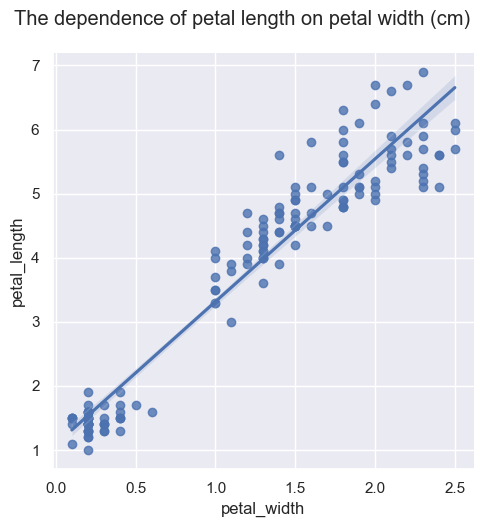

In [60]:
sns.lmplot(data = iris, x = 'petal_width', y = 'petal_length', ci = 95)
plt.suptitle ("The dependence of petal length on petal width (cm)", y = 1.05)

We can also create Linear Regressions for each species separately, but I'll visualize that only, while using the whole dataset for prediction. Say, I want to create ***any*** artificial iris with true-to-life petal proportions:)

Text(0.5, 1.05, 'The dependence of petal length on petal width (cm)')

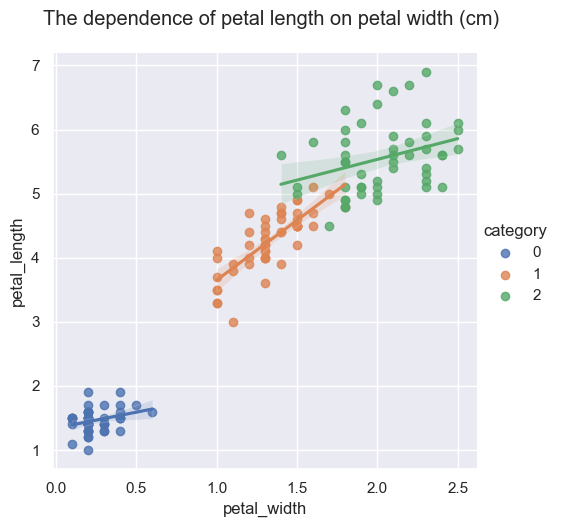

In [61]:
sns.lmplot(data = iris, x = 'petal_width', y = 'petal_length', ci = 95, hue = 'category')
plt.suptitle ("The dependence of petal length on petal width (cm)", y = 1.05)

So, let's use our whole-dataset model for prediction.

0     2.759986
1     7.768228
2    23.349425
dtype: float64


Text(0.5, 1, 'Petal length prediction (cm)')

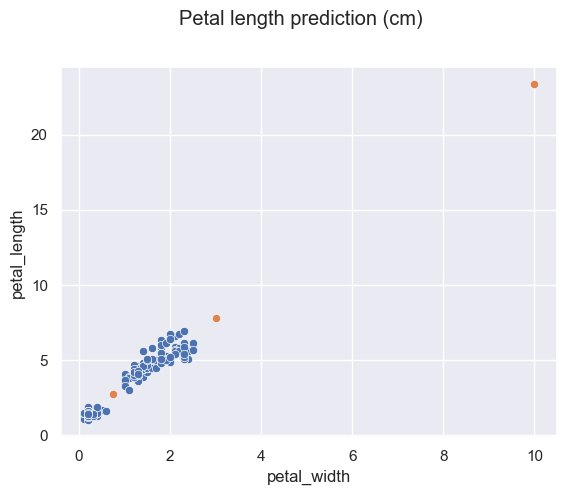

In [55]:
values_to_predict = [0.75, 3, 10]

basic_plot = sns.scatterplot (data = iris, x = 'petal_width', y = 'petal_length')
new_data = pd.DataFrame(values_to_predict, columns = ['petal_width'])
length_predicted = model.predict(new_data)
print (length_predicted)

new_data['length_predicted'] = length_predicted
sns.scatterplot(data = new_data, x = 'petal_width', y = 'length_predicted')

plt.suptitle ("Petal length prediction (cm)", y = 1)



So, if we want to draw or create an iris, which petal's width is 10 cm, then its length should be about 23.34 cm.